In [1]:
import pandas as pd

**FIRST VIEW ON DATA**

In [2]:
#Read the csv file into a data frame
df = pd.read_csv('A2Z_insurance.csv')
#print the first 5 rows of the data frame
print(df.head(3))
print(df.shape)

   Customer Identity  First Policy´s Year  Brithday Year Educational Degree  \
0                  1               1985.0         1982.0    2 - High School   
1                  2               1981.0         1995.0    2 - High School   
2                  3               1991.0         1970.0          1 - Basic   

   Gross Monthly Salary  Geographic Living Area  Has Children (Y=1)  \
0                2177.0                     1.0                 1.0   
1                 677.0                     4.0                 1.0   
2                2277.0                     3.0                 0.0   

   Customer Monetary Value  Claims Rate  Premiums in LOB: Motor  \
0                   380.97         0.39                  375.85   
1                  -131.13         1.12                   77.46   
2                   504.67         0.28                  206.15   

   Premiums in LOB: Household  Premiums in LOB: Health  \
0                       79.45                   146.36   
1            

In [3]:
#We don't have duplicated data 
df.duplicated().sum()

0

## PROBLEM ##

In [4]:
df[df['First Policy´s Year'] < df['Brithday Year']].count()

Customer Identity                      1997
First Policy´s Year                    1997
Brithday Year                          1997
Educational Degree                     1996
Gross Monthly Salary                   1985
Geographic Living Area                 1997
Has Children (Y=1)                     1994
Customer Monetary Value                1997
Claims Rate                            1997
Premiums in LOB: Motor                 1989
Premiums in LOB: Household             1997
Premiums in LOB: Health                1985
Premiums in LOB:  Life                 1985
Premiums in LOB: Work Compensations    1981
dtype: int64

In [5]:
#NULLS
df.isnull().sum()

Customer Identity                        0
First Policy´s Year                     30
Brithday Year                           17
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  34
Premiums in LOB: Household               0
Premiums in LOB: Health                 43
Premiums in LOB:  Life                 104
Premiums in LOB: Work Compensations     86
dtype: int64

In [6]:
df.info()
#It means we have null values, we have to replace them, otherwise the cluster won't work.
#The object type means string on this case, in this case it's the colunm Educational Degree

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
Customer Identity                      10296 non-null int64
First Policy´s Year                    10266 non-null float64
Brithday Year                          10279 non-null float64
Educational Degree                     10279 non-null object
Gross Monthly Salary                   10260 non-null float64
Geographic Living Area                 10295 non-null float64
Has Children (Y=1)                     10275 non-null float64
Customer Monetary Value                10296 non-null float64
Claims Rate                            10296 non-null float64
Premiums in LOB: Motor                 10262 non-null float64
Premiums in LOB: Household             10296 non-null float64
Premiums in LOB: Health                10253 non-null float64
Premiums in LOB:  Life                 10192 non-null float64
Premiums in LOB: Work Compensations    10210 non-null float64
dtypes: float64(12), int64

In [7]:
df.describe()

#Give us some statistics about the data
#Ex: we have 10296 rows, if the max on customer identity was bigger than this it will be something very wrong.

,Customer Identity,First Policy´s Year,Brithday Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,10296.00000,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,5148.50000,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.00000,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [8]:
#The have a guy from the future and one guy with 965y
#We'll delete these rows by index.
print(df[df['Brithday Year'] == 1028.0].index) #Index 7197
print(df[df['First Policy´s Year'] == 53784].index) #Index 9294

Int64Index([7195], dtype='int64')
Int64Index([9294], dtype='int64')


In [9]:
df = df.drop([df.index[7195], df.index[9294]])

df.shape
#print(df[df['First Policy´s Year'] == 53784])
#print(df[df['Brithday Year'] == 1028.0])

(10294, 14)

In [10]:
mode_geo = df['Geographic Living Area'].mode()
print(mode_geo)

0    4.0
dtype: float64


In [32]:
df['Geographic Living Area'] = df['Geographic Living Area'].fillna(4.0) #Porque é que não funciona com o mode_geo ???

df['Geographic Living Area'].isnull().sum()

0

In [33]:
df_edu = df[['Educational Degree', 'Gross Monthly Salary']]
#df_edu

In [34]:
df_not_nan = df_edu[df_edu.notna().any(axis = 1)]
#df_not_nan

In [35]:
df_notNA_grouped = df_not_nan.groupby(['Educational Degree'])['Gross Monthly Salary'].mean()
df_notNA_grouped
#This is for Maren to use and myself

Educational Degree
1 - Basic          1981.905213
2 - High School    2512.059395
3 - BSc/MSc        2616.703370
4 - PhD            2664.512195
Name: Gross Monthly Salary, dtype: float64

In [132]:
df_nan_all = df_edu[df_edu.isna().all(axis = 1)]

df_nan = df_edu[df_edu.isna().any(axis = 1)]
df_nan
#print(df.loc[6560]) #Esta posição tem o Edu e o salary a Null

,Educational Degree,Gross Monthly Salary
21,2 - High School,NaN
143,3 - BSc/MSc,NaN
488,3 - BSc/MSc,NaN
539,2 - High School,NaN
830,2 - High School,NaN
896,NaN,2643.0
1160,3 - BSc/MSc,NaN
1707,NaN,3827.0
1780,3 - BSc/MSc,NaN
1816,3 - BSc/MSc,NaN


In [36]:
df.loc[896,'Educational Degree'] = '3 - BSc/MSc'

df.loc[1707,'Educational Degree'] = '4 - PhD'

df.loc[2449,'Educational Degree'] = '4 - PhD'

df.loc[2728,'Educational Degree'] = '4 - PhD'

df.loc[2770,'Educational Degree'] = '1 - Basic'

df.loc[3056,'Educational Degree'] = '2 - High School'

df.loc[4423,'Educational Degree'] = '4 - PhD'

df.loc[6535,'Educational Degree'] = '2 - High School'

df.loc[7321,'Educational Degree'] = '4 - PhD'

df.loc[7470,'Educational Degree'] = '4 - PhD'

df.loc[8081,'Educational Degree'] = '4 - PhD'

df.loc[8173,'Educational Degree'] = '4 - PhD'

df.loc[8303,'Educational Degree'] = '4 - PhD'

df.loc[9136,'Educational Degree'] = '1 - Basic'

df.loc[9136,'Educational Degree'] = '1 - Basic'

df.loc[9312,'Educational Degree'] = '2 - High School'

df.loc[9610,'Educational Degree'] = '4 - PhD'

In [38]:
df['Educational Degree'].isnull().sum()

#É o que tem NaN no Educational Degree e no Salary

1

**Let's try to visualize something**

In [133]:
import matplotlib.pyplot as plt

In [134]:
df_above = df[df['Gross Monthly Salary'] < 10000]

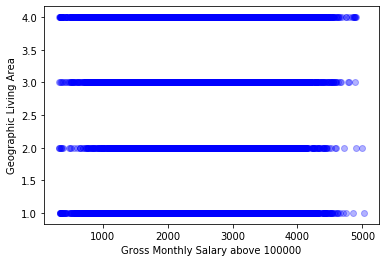

In [135]:
#plt.scatter(df['Gross Monthly Salary'], df['Geographic Living Area'], color = 'blue', alpha = 0.3)
plt.scatter(df_above['Gross Monthly Salary'], df_above['Geographic Living Area'], color = 'blue', alpha = 0.3)
plt.xlabel('Gross Monthly Salary above 100000')
plt.ylabel('Geographic Living Area')
plt.show()

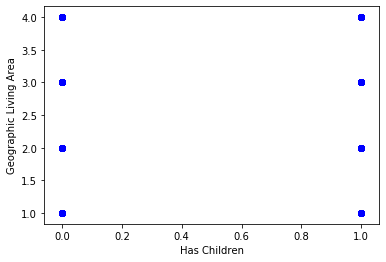

In [136]:
plt.scatter(df['Has Children (Y=1)'], df['Geographic Living Area'], color = 'blue', alpha = 0.3)
plt.xlabel('Has Children')
plt.ylabel('Geographic Living Area')
plt.show()

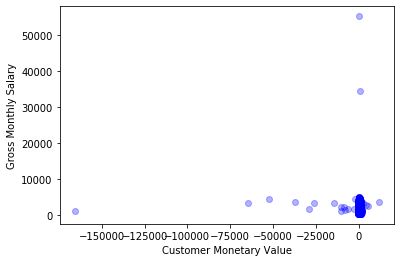

In [137]:
plt.scatter(df['Customer Monetary Value'], df['Gross Monthly Salary'], color = 'blue', alpha = 0.3)
plt.xlabel('Customer Monetary Value')
plt.ylabel('Gross Monthly Salary')
plt.show()

In [138]:
#Let's zoom this
#Those soft blue points are outliers, can be removed. (this color is given by alpha parameters, it says that there are less people in that area)
df_ab = df[(df['Gross Monthly Salary'] < 10000) & (df['Customer Monetary Value'] > -25000)]

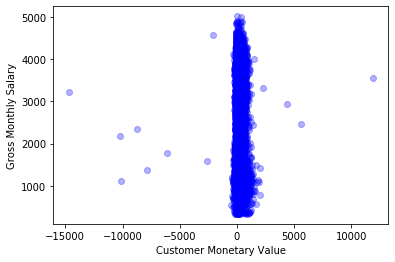

In [139]:
plt.scatter(df_ab['Customer Monetary Value'], df_ab['Gross Monthly Salary'], color = 'blue', alpha = 0.3)
plt.xlabel('Customer Monetary Value')
plt.ylabel('Gross Monthly Salary')
plt.show()

TypeError: nan is not a string

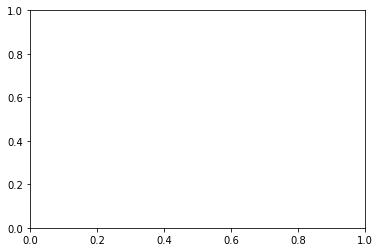

In [140]:
plt.scatter(df['Educational Degree'], df['Gross Monthly Salary'], color = 'blue', alpha = 0.3)
plt.xlabel('Educational Degree')
plt.ylabel('Gross Monthly Salary')
plt.show()

In [141]:
## SEE ???? NAN IS A PROBLEM!!!!!!!!! ##
#Let's try to replace that:

df['Educational Degree'] = df['Educational Degree'].fillna('1 - Basic') #This could be like a business rule, and is always discussed with the client.

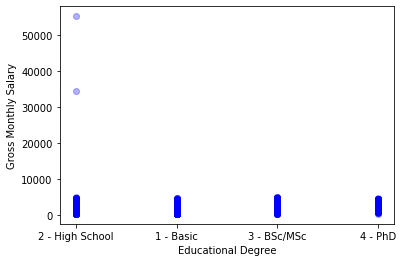

In [142]:
plt.scatter(df['Educational Degree'], df['Gross Monthly Salary'], color = 'blue', alpha = 0.3)
plt.xlabel('Educational Degree')
plt.ylabel('Gross Monthly Salary')
plt.show()

In [143]:
#For my ladies: Try to find some correlated variables 
#Lots of kisses xxx

In [144]:
df_grouped = df.groupby('Educational Degree')['Gross Monthly Salary'].mean()

In [145]:
df_grouped

Educational Degree
1 - Basic          1994.749415
2 - High School    2512.059395
3 - BSc/MSc        2616.708874
4 - PhD            2664.512195
Name: Gross Monthly Salary, dtype: float64

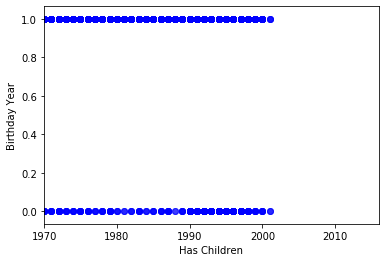

In [146]:
plt.scatter(df['Brithday Year'], df['Has Children (Y=1)'], color = 'blue', alpha = 0.3)
plt.xlabel('Has Children')
plt.ylabel('Birthday Year')
plt.xlim(1970, 2016)
plt.show()